## welcome

* Are paid apps getting more popular the free apps? 
* Which category has the highest share? 
* What is the distribution of rating?
* What is the correlation between the size of the app and the cost or her popularity.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
app_df = pd.read_csv("googleplaystore.csv",encoding= "utf-8")
reviews_df = pd.read_csv("googleplaystore_user_reviews.csv")

In [3]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
app_df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
app_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
reviews_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [7]:
reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### <span style="color:red">Data cleaning</span> 
* there are no all-blank rows
* there are many reviews with App names but without any other information 
* change the datatype of "Price" and "Installs" to float
* remove duplicate

In [8]:
print("reviews DataFrame shape before:", reviews_df.shape)
columns = ["Translated_Review","Sentiment","Sentiment_Polarity","Sentiment_Subjectivity"]
null_rows = reviews_df[reviews_df[columns].isna().any(axis=1)]
reviews_df.drop(index=null_rows.index, inplace=True)
print("reviews DataFrame shape after:", reviews_df.shape)

reviews DataFrame shape before: (64295, 5)
reviews DataFrame shape after: (37427, 5)


In [9]:
#there is one row with bed data that i need to remove
bed_row = app_df.loc[app_df["App"]=="Life Made WI-Fi Touchscreen Photo Frame"].index
app_df.drop(index=bed_row, inplace=True)

In [10]:
app_df["Price"] = app_df["Price"].str.replace('$','', regex=True)
app_df["Installs"]= app_df["Installs"].str.replace(r'[\+\,]','', regex=True)

In [11]:
app_df["Price"]= app_df["Price"].astype("float")
app_df["Installs"] = pd.to_numeric(app_df["Installs"])
app_df["Installs"]= app_df["Installs"].astype("int32")

##### Convert "Size" to Mb

In [12]:
app_df["Size"] = app_df["Size"].str.replace('Varies with device', 'NaN')
app_df["Size"] = app_df["Size"].str.replace('M', '')
app_df["Size"] = app_df["Size"].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
app_df['Size'] = app_df['Size'].apply(lambda x: float(x))

##### Convert to lowercase letters

In [13]:
app_df["App"] = app_df["App"].str.lower()
app_df["Category"] = app_df["Category"].str.lower()
app_df["Genres"] = app_df["Genres"].str.lower()

##### Remove duplicate

In [14]:
print("There are {} duplicates rows in App DataFrame".format(app_df.duplicated(subset=["App"]).sum()))
# print("there are {} duplicates rows", reviews_df.duplicated().sum())

There are 1202 duplicates rows in App DataFrame


In [15]:
app_df.drop_duplicates(subset=["App"],inplace=True)

##### Removing outliers
* I assume that apps that cost more than 70$ are probably a scam. 
* There aren't apps with ratings of more than 5.0

In [16]:
app_df.loc[app_df["Price"]>70.0].head(10)
#"💎 i'm rich app i porbebly a scam"

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,vargo anesthesia mega app,medical,4.6,92,32.0,1000,Paid,79.99,Everyone,medical,"June 18, 2018",19.0,4.0.3 and up
2390,language therapy: aphasia,medical,NaN,10,28.0,1000,Paid,74.99,Everyone,medical,"June 25, 2018",3.1.1,4.0.3 and up
4197,most expensive app (h),family,4.3,6,1.5,100,Paid,399.99,Everyone,entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 i'm rich,lifestyle,3.8,718,26.0,10000,Paid,399.99,Everyone,lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,i'm rich - trump edition,lifestyle,3.6,275,7.3,10000,Paid,400.00,Everyone,lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,i am rich,lifestyle,3.8,3547,1.8,100000,Paid,399.99,Everyone,lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,i am rich plus,family,4.0,856,8.7,10000,Paid,399.99,Everyone,entertainment,"May 19, 2018",3.0,4.4 and up
5355,i am rich vip,lifestyle,3.8,411,2.6,10000,Paid,299.99,Everyone,lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,i am rich premium,finance,4.1,1867,4.7,50000,Paid,399.99,Everyone,finance,"November 12, 2017",1.6,4.0 and up
5357,i am extremely rich,lifestyle,2.9,41,2.9,1000,Paid,379.99,Everyone,lifestyle,"July 1, 2018",1.0,4.0 and up


In [17]:
scam_apps = app_df.loc[app_df["Price"]>70.0].index
app_df.drop(index=scam_apps, axis=1, inplace=True)

##### Deal with datetime

##### Save the cleaned file

In [18]:
app_df.to_csv("cleaned googleplaystore.csv", index=False)
reviews_df.to_csv("cleaned googleplaystore_user_reviews.csv", index=False)

### <span style="color:red">EDA</span>

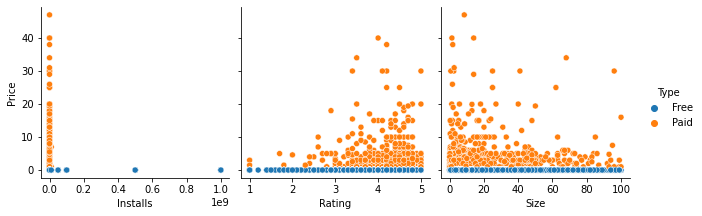

In [19]:
sns.pairplot(data=app_df, hue="Type",y_vars=['Price'], x_vars=['Installs','Rating','Size'],height=3)

##### Rating distribution

In [20]:
app_df.Rating.describe()

count    8166.000000
mean        4.174284
std         0.536700
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Rating distribution')

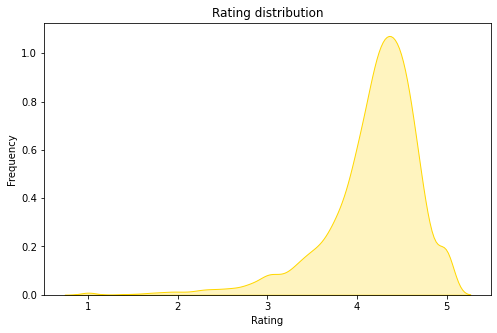

In [35]:
plt.figure(figsize=(8,5))
kde = sns.kdeplot(app_df.Rating, color="gold",shade=True)
kde.set_xlabel("Rating")
kde.set_ylabel("Frequency")
plt.title("Rating distribution")

In [41]:
app_df.loc[app_df["Rating"]>4.0]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,photo editor & candy camera & grid & scrapbook,art_and_design,4.1,159,19.000,10000,Free,0.0,Everyone,art & design,"January 7, 2018",1.0.0,4.0.3 and up
2,"u launcher lite – free live cool themes, hide ...",art_and_design,4.7,87510,8.700,5000000,Free,0.0,Everyone,art & design,"August 1, 2018",1.2.4,4.0.3 and up
3,sketch - draw & paint,art_and_design,4.5,215644,25.000,50000000,Free,0.0,Teen,art & design,"June 8, 2018",Varies with device,4.2 and up
4,pixel draw - number art coloring book,art_and_design,4.3,967,2.800,100000,Free,0.0,Everyone,art & design;creativity,"June 20, 2018",1.1,4.4 and up
5,paper flowers instructions,art_and_design,4.4,167,5.600,50000,Free,0.0,Everyone,art & design,"March 26, 2017",1.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,chemin (fr),books_and_reference,4.8,44,0.619,1000,Free,0.0,Everyone,books & reference,"March 23, 2014",0.8,2.2 and up
10836,sya9a maroc - fr,family,4.5,38,53.000,5000,Free,0.0,Everyone,education,"July 25, 2017",1.48,4.1 and up
10837,fr. mike schmitz audio teachings,family,5.0,4,3.600,100,Free,0.0,Everyone,education,"July 6, 2018",1.0,4.1 and up
10839,the scp foundation db fr nn5n,books_and_reference,4.5,114,NaN,1000,Free,0.0,Mature 17+,books & reference,"January 19, 2015",Varies with device,Varies with device


### <span style="color:red">correlations</span>

### <span style="color:red">conclusion</span>

### <span style="color:red">Bonus: Python vs SQL</span>

In [22]:
#@usd_decorator 
# app_df.to_clipboard(sep=",")